# <b>Uso de Widgets para embellecer los códigos</b>

Toda esta data la estoy sacando de un [artículo de Medium.com](https://medium.com/@jdchipox/how-to-interact-with-jupyter-33a98686f24e).

En el mismo te tiran una [lista de Widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html) que se pueden usar!

***

## 1. Definición, declaración y un par de ejemplos

In [2]:
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
from matplotlib import pyplot as plt
%matplotlib widget

Vamos a definir algunos Widgets sencillos

In [4]:
text = widgets.Text(value = 'Texto',
                    description = 'Título')

calendar = widgets.DatePicker(description = 'Seleccionar una fecha')

slider = widgets.FloatSlider(value = 1.0,
                             min = 0.0,
                             max = 10.0,
                             step = 0.1)

menu = widgets.Dropdown(options = ['Rojo', 'Azul', 'Verde'],
                        value = 'Rojo',
                        description = 'Color: ')

checkbox = widgets.Checkbox(description = 'Seleccionar para invertir.')

In [5]:
text

Text(value='Texto', description='Título')

In [6]:
calendar

DatePicker(value=None, description='Seleccionar una fecha')

In [7]:
slider

FloatSlider(value=1.0, max=10.0)

In [8]:
menu

Dropdown(description='Color: ', options=('Rojo', 'Azul', 'Verde'), value='Rojo')

In [9]:
checkbox

Checkbox(value=False, description='Seleccionar para invertir.')

Como vemos, podemos instanciarlos muy fácilmente y sus argumentos son fáciles de entender!.

Hay otros Widgets que sirven de **contenedores**.

In [10]:
box = widgets.VBox([text, slider, menu, calendar, checkbox])
box

Vemos que tenemos todo en un solo lugar, mucho más bonito. Hay un par de cosas que se pueden hacer con esto.

1. Se pueden ordenar de manera vertical con `VBox`
2. Se pueden ordenar de manera horizontal con `HBox`
3. Se pueden anidar!

In [11]:
h_box = widgets.HBox([text, slider])
h_box

In [12]:
anidados = widgets.HBox([box, h_box])
anidados

También se pueden comer en sabor de **tabs**

In [13]:
children = [box, h_box]
tab = widgets.Tab()
tab.children = children

tab.set_title(0, 'Box tipo vertical')
tab.set_title(1, 'Box tipo horizontal')

tab

## 2. Vamos a darle algún uso!

La parte obvia de esto es poder extraer información de los sliders, de las cajas de texto para poder ser usada en código.

Esto lo hacemos fácilmente accediendo al atributo `menu.options` para el caso de las opciones de un *Menú* o `text.value` para el contenido de una *caja de texto*

In [32]:
text.value

'Texto'

In [35]:
text.value = 'Cambiamos el texto'
text

Text(value='Cambiamos el texto', description='Título')

Pegamos como imagen para ver que cambió (porque cuando modifique abajo me lo va a cambiar acá también jeje)

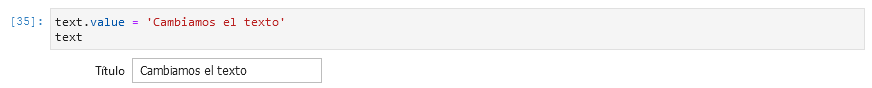

In [36]:
text

Text(value='Cambiamos el texto', description='Título')

In [37]:
text.value

'Voy a poder otra cosa acá'

Lo mismo pasa con un slider

In [43]:
slid = widgets.FloatSlider(value = 1.0,
                           min = 0.0,
                           max = 10.0,
                           step = 0.1)
slid

FloatSlider(value=1.0, max=10.0)

In [47]:
print(f'El valor del slide quedó en {slid.value} y es de tipo {type(slid.value)}.')

El valor del slide quedó en 4.8 y es de tipo <class 'float'>.


Vamos con un gráfico básico ahora

Text(0.5, 1.0, 'Grafiquito')

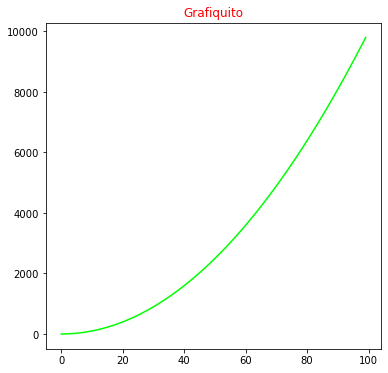

In [76]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
x = [i for i in range(100)]
y = [i**2 for i in x]
ax.plot(x, y,
        color = (0, 1, slid2.value))
ax.set_title('Grafiquito',
             c = menu_graf.value)

In [67]:
menu_graf = widgets.Dropdown(options = ['red', 'green', 'blue'], 
                             value = 'red',
                             description = 'Seleccionar color: ')
slid2 = widgets.FloatSlider(value = 0,
                            min = 0,
                            max = 1,
                            step = 0.05)
conj = widgets.VBox([menu_graf, slid2])
conj

***
***

Ejemplo de graficador

In [1]:
from IPython.core.display import display, HTML, Markdown, clear_output
import json
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Defining Widgets: 
equation = widgets.Text(
            value='np.sin(X*Y)+np.cos(X+Y)',
            placeholder='Type something',
            description='Equation:')
range_ = widgets.FloatRangeSlider(
    value=[-5, 5],
    min=-100,
    step=0.1,
    description='range:',
    orientation='horizontal',
    readout=True,
    readout_format='d',)
points = widgets.IntText(
    value=50,
    description='Detail:')

# DEFINING FUNCTIONS
def plot2D(x_points):
    # I find where the letter X is in my equation text and replace by placeholders {}
    number_of_placeholders = equation.value.count('X')
    decomposed_equation = equation.value.replace('X', '{}')
    y = []
    for point in x_points:
        dicti = {i: point for i in range(number_of_placeholders)}
        decomposed_eq = decomposed_equation.format(*dicti.values())   
        # WARNING: couldn't figure out any other way, let me know if you know
        exec("""global res
res = {}""".format(decomposed_eq))
        y.append(res)
    plt.plot(x_points, y)
    plt.show()

def plot3D(X, Y, Z):
    options = {
        "width": "100%",
        "style": "surface",
        "showPerspective": True,
        "showGrid": True,
        "showShadow": True,
        "keepAspectRatio": False,
        "height": "600px"}
     # LOADING DATA
    data = [ {"x": X[y,x], 
              "y": Y[y,x], 
              "z": Z[y,x]} for y in range(Y.shape[0]) for x in range(Y.shape[1]) ]  
    visual_code = r"""
       <link href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.css" type="text/css" rel="stylesheet" />
       <script src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.js"></script>
       <div id="pos" style="top:0px;left:0px;position:absolute;"></div>
       <div id="visualization"></div>      
       <script type="text/javascript">
        var data = new vis.DataSet();
        data.add(""" + json.dumps(data) + """);
        var options = """ + json.dumps(options) + """;
        var container = document.getElementById("visualization");
        var graph3d = new vis.Graph3d(container, data, options);
        // setting the camera position initial
        graph3d.setCameraPosition({horizontal:0.8197963, vertical:0.945, distance:1.988})
        graph3d.on("cameraPositionChange", function(evt)
        {
            elem = document.getElementById("pos");
            elem.innerHTML = "Horizontal: " + evt.horizontal + "<br>Vertical: " + evt.vertical + "<br>Camera Distance: " + evt.distance;
        });
       </script>
    """
    html= "<iframe srcdoc='"+visual_code+"' width='75%' height='600px' style='border:10;' scrolling='no'> </iframe>"
    display(HTML(html))
    
# CREATING BUTTON
# if X and Y are inside equation.value we run plot3D
# otherwise we run plot2D
button = widgets.Button(description='Reveal Equation')
out = widgets.Output()
def on_button_clicked(b):
    global X, Y
    with out:
        clear_output()    
        # computing the x points to evaluate our function
        x_points = np.linspace(range_.value[0], 
            range_.value[1], points.value)
        X, Y = np.meshgrid(x_points, x_points)
        # WARNING: couldn't figure out any other way, let me know if you know
        exec("""global Z
Z = {}
""".format(equation.value))
        if 'Y' in equation.value and 'X' in equation.value:
            plot3D(X,Y,Z)
        elif 'Y' in equation.value:
            equation.value = equation.value.replace('Y', 'X')
            plot2D(x_points)
        else:
            plot2D(x_points)    
button.on_click(on_button_clicked)
info = Markdown("""# 2D/3D Grapher
- Write down the equation you want to plot in the Equation window. 
- If only $X$ or $Y$ is defined in the equation a 2D plot will be shown.
- If $Y$ and $X$ are defined a 3D plot will be shown.
- Detail specifies the number of points created between the specified range.""")
grapher = widgets.VBox([points, range_,  equation, button, out])
display(info, grapher)

# 2D/3D Grapher
- Write down the equation you want to plot in the Equation window. 
- If only $X$ or $Y$ is defined in the equation a 2D plot will be shown.
- If $Y$ and $X$ are defined a 3D plot will be shown.
- Detail specifies the number of points created between the specified range.

***
***